In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import pandas_profiling
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve


plt.style.use('ggplot')



In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve, auc, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [3]:
kickstarter = pd.read_csv(r'C:\Users\hp\Downloads\data\KickstarterSuccess\kickstarterNew.csv')

In [4]:
X = kickstarter[['goal', 'staff_pick_True',
        'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [10]:
X.shape

(210088, 17)

In [11]:
y.shape

(210088,)

In [5]:
X_mid, X_test_sc, y_mid, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [6]:
X_train_sc, X_val_sc, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.30, random_state=42, stratify = y_mid)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train_sc)
X_train = scaler.transform(X_train_sc)
X_val = scaler.transform(X_val_sc)
X_test = scaler.transform(X_test_sc)

In [8]:
#LOGISTIC REGRESSION
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
param_grid = dict(C=C, penalty=penalty)

logistic = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100,
          n_jobs=None, random_state=None,
          tol=0.0001, verbose=0, warm_start=False)
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_val)

print('Logistic Results:')
print(confusion_matrix(y_val,logistic_pred))
print(classification_report(y_val, logistic_pred))
print('Logistic score: %f' % logistic.fit(X_train, y_train).score(X_val, y_val))

Logistic Results:
[[ 8570 10680]
 [ 3976 20893]]
              precision    recall  f1-score   support

           0       0.68      0.45      0.54     19250
           1       0.66      0.84      0.74     24869

    accuracy                           0.67     44119
   macro avg       0.67      0.64      0.64     44119
weighted avg       0.67      0.67      0.65     44119

Logistic score: 0.667808


In [9]:
logistic_y_score = logistic.predict_proba(X_val)[:, 1]
logistic_fpr, logistic_tpr, logistic_auc_thresholds = roc_curve(y_val, logistic_y_score)
roc_auc_logistic = auc(logistic_fpr, logistic_tpr)
print(auc(logistic_fpr, logistic_tpr))

0.7261252380656458


In [10]:
logistic_pred_test = logistic.predict(X_test)
fbeta_score(y_test, logistic_pred_test, average='binary', beta=0.5)



0.6917318010508141

In [11]:
print('Logistic Results:')
#print(confusion_matrix(y_test,logistic_pred_test))
print(classification_report(y_test, logistic_pred_test))

Logistic Results:
              precision    recall  f1-score   support

           0       0.68      0.45      0.54     27499
           1       0.66      0.84      0.74     35528

    accuracy                           0.67     63027
   macro avg       0.67      0.64      0.64     63027
weighted avg       0.67      0.67      0.65     63027



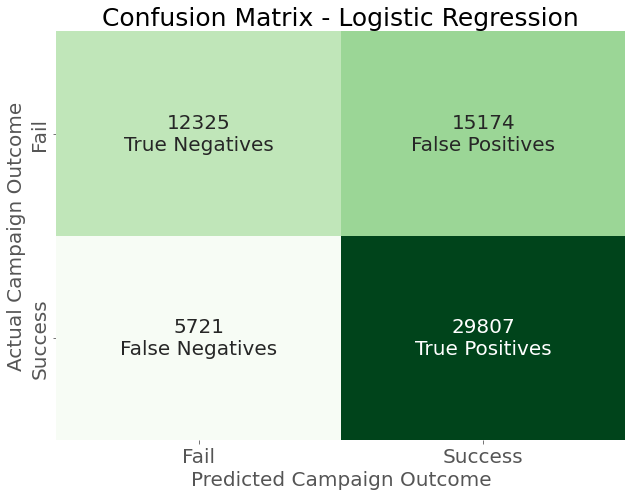

In [12]:
cm = confusion_matrix(y_test,logistic_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Greens', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - Logistic Regression', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 20)
ax.set_yticklabels(labels, size = 20)
plt.tight_layout()
#plt.savefig('Confusion_matrix_Logistic.png')
#plt.savefig('Confusion_matrix_Logistic.svg')
plt.show()

In [13]:
logistic_y_score_test = logistic.predict_proba(X_test)[:, 1]
logistic_fpr_test, logistic_tpr_test, logistic_auc_thresholds = roc_curve(y_test, logistic_y_score_test)
roc_auc_logistic_test = auc(logistic_fpr_test, logistic_tpr_test)
print(auc(logistic_fpr_test, logistic_tpr_test))



0.7222728592149006


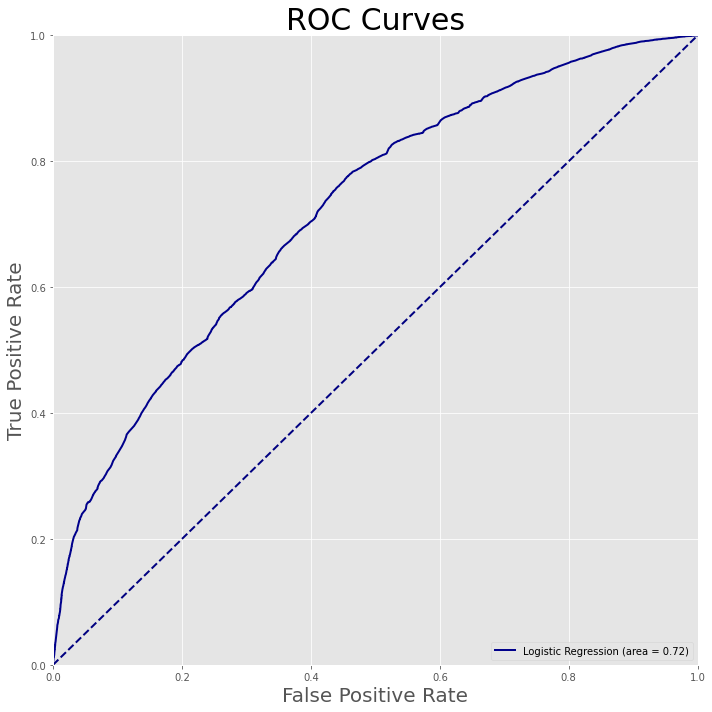

In [14]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr_test, logistic_tpr_test, color='darkblue',
         lw=lw, label='Logistic Regression (area = %0.2f)' % roc_auc_logistic_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title('ROC Curves', size = 30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [15]:
#NAIVE BAYES

bernoulli = naive_bayes.BernoulliNB(alpha=0.2, binarize=0.0, class_prior=None, fit_prior=True)
bernoulli.fit(X_train, y_train)



BernoulliNB(alpha=0.2)

In [16]:
bernoulli_pred = bernoulli.predict(X_val)
print('Bernoulli Results:')
print(confusion_matrix(y_val,bernoulli_pred))
print(classification_report(y_val, bernoulli_pred))
print('Bernoulli score: %f' % bernoulli.fit(X_train, y_train).score(X_val, y_val))



Bernoulli Results:
[[ 8101 11149]
 [ 3769 21100]]
              precision    recall  f1-score   support

           0       0.68      0.42      0.52     19250
           1       0.65      0.85      0.74     24869

    accuracy                           0.66     44119
   macro avg       0.67      0.63      0.63     44119
weighted avg       0.67      0.66      0.64     44119

Bernoulli score: 0.661869


In [17]:
bernoulli_y_score = bernoulli.predict_proba(X_val)[:, 1]
bernoulli_fpr, bernoulli_tpr, auc_thresholds = roc_curve(y_val, bernoulli_y_score)
roc_auc_bernoulli = auc(bernoulli_fpr, bernoulli_tpr)
print(auc(bernoulli_fpr, bernoulli_tpr))

0.714082630385819


In [18]:
bernoulli_pred_test = bernoulli.predict(X_test)
fbeta_score(y_test, bernoulli_pred_test, average='binary', beta=0.5)

0.6863075605444904

In [19]:
print('Bernoulli Results:')
#print(confusion_matrix(y_test,bernoulli_pred_test))
print(classification_report(y_test, bernoulli_pred_test))

Bernoulli Results:
              precision    recall  f1-score   support

           0       0.68      0.42      0.52     27499
           1       0.66      0.85      0.74     35528

    accuracy                           0.66     63027
   macro avg       0.67      0.64      0.63     63027
weighted avg       0.67      0.66      0.64     63027



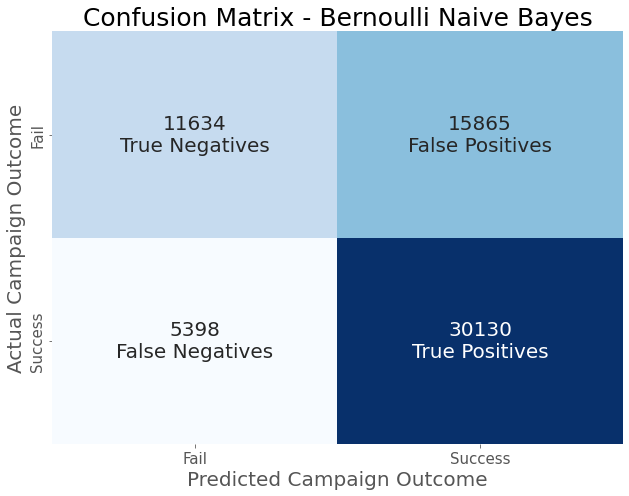

In [20]:
cm = confusion_matrix(y_test,bernoulli_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - Bernoulli Naive Bayes', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
#plt.savefig('Confusion_matrix_Bernoulli.png')
#plt.savefig('Confusion_matrix_Bernoulli.svg')
plt.show()

In [21]:
bernoulli_y_score_test = bernoulli.predict_proba(X_test)[:, 1]
bernoulli_fpr_test, bernoulli_tpr_test, bernoulli_auc_thresholds = roc_curve(y_test, bernoulli_y_score_test)
roc_auc_bernoulli_test = auc(bernoulli_fpr_test, bernoulli_tpr_test)
print(auc(bernoulli_fpr_test, bernoulli_tpr_test))



0.7119687809122109


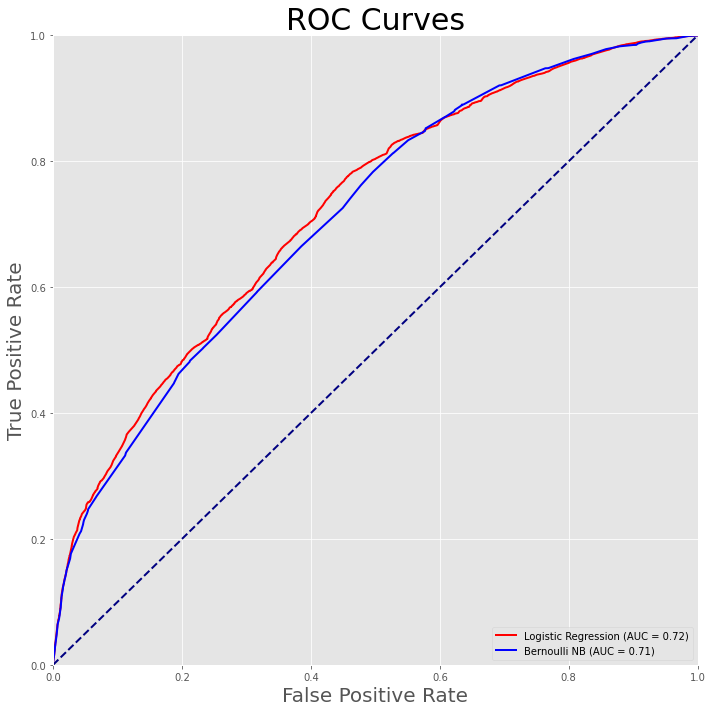

In [22]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr_test, logistic_tpr_test, color='red',
         lw=lw, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic_test)
plt.plot(bernoulli_fpr_test, bernoulli_tpr_test, color='blue',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title('ROC Curves', size = 30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [23]:
#KNN 
knn_25 = KNeighborsClassifier(n_neighbors = 25)
knn_25.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=25)

In [24]:
predictions = knn_25.predict(X_val)
print(confusion_matrix(y_val,predictions))
print(classification_report(y_val, predictions))

[[10928  8322]
 [ 5614 19255]]
              precision    recall  f1-score   support

           0       0.66      0.57      0.61     19250
           1       0.70      0.77      0.73     24869

    accuracy                           0.68     44119
   macro avg       0.68      0.67      0.67     44119
weighted avg       0.68      0.68      0.68     44119



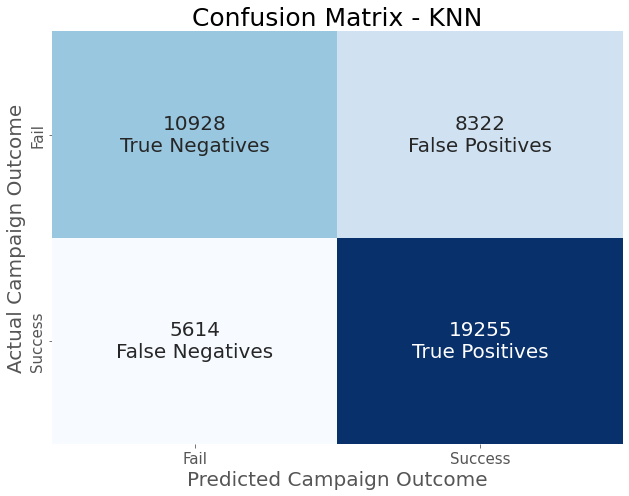

In [25]:
cm = confusion_matrix(y_val,predictions)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - KNN', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
#plt.savefig('Confusion_matrix_Bernoulli.png')
#plt.savefig('Confusion_matrix_Bernoulli.svg')
plt.show()

In [26]:
knn_y_score_test = knn_25.predict_proba(X_test)[:, 1]
knn_fpr_test, knn_tpr_test, knn_auc_thresholds = roc_curve(y_test, knn_y_score_test)
roc_auc_knn_test = auc(knn_fpr_test, knn_tpr_test)
print(auc(knn_fpr_test, knn_tpr_test))


0.7413515206821015


In [28]:
#RANDOM FOREST
forest = RandomForestClassifier()
forest.fit(X_train, y_train)


RandomForestClassifier()

In [29]:
forest_pred = forest.predict(X_val)


In [30]:
print('Forest Results:')
print(confusion_matrix(y_val, forest_pred))
print(classification_report(y_val, forest_pred))
print('Forest score: %f' % forest.fit(X_train, y_train).score(X_val, y_val))



Forest Results:
[[10951  8299]
 [ 5566 19303]]
              precision    recall  f1-score   support

           0       0.66      0.57      0.61     19250
           1       0.70      0.78      0.74     24869

    accuracy                           0.69     44119
   macro avg       0.68      0.67      0.67     44119
weighted avg       0.68      0.69      0.68     44119

Forest score: 0.686802


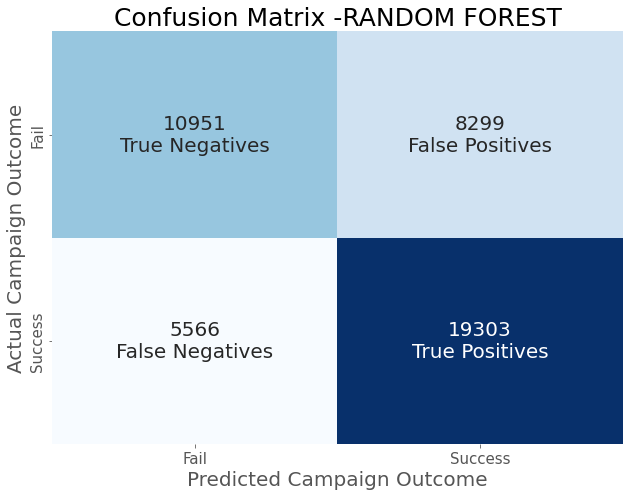

In [31]:
cm = confusion_matrix(y_val,forest_pred)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix -RANDOM FOREST', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
#plt.savefig('Confusion_matrix_Bernoulli.png')
#plt.savefig('Confusion_matrix_Bernoulli.svg')
plt.show()

In [32]:
forest_y_score = forest.predict_proba(X_val)[:, 1]
forest_fpr, forest_tpr, auc_thresholds = roc_curve(y_val, forest_y_score)
roc_auc_forest = auc(forest_fpr, forest_tpr)
print(auc(forest_fpr, forest_tpr))

0.740760803232314


In [33]:
#GRADIENT BOOSTING-XGBOOST
import xgboost as xgb
from xgboost import XGBClassifier



In [34]:
xgBoost = XGBClassifier()

In [35]:
xgBoost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [36]:
xgBoost_pred = xgBoost.predict(X_val)

In [37]:
print('XGBoost Results:')
print(confusion_matrix(y_val, xgBoost_pred))
print(classification_report(y_val, xgBoost_pred))
print('XGBoost score: %f' % xgBoost.fit(X_train, y_train).score(X_val, y_val))

XGBoost Results:
[[10782  8468]
 [ 5033 19836]]
              precision    recall  f1-score   support

           0       0.68      0.56      0.61     19250
           1       0.70      0.80      0.75     24869

    accuracy                           0.69     44119
   macro avg       0.69      0.68      0.68     44119
weighted avg       0.69      0.69      0.69     44119

XGBoost score: 0.693987


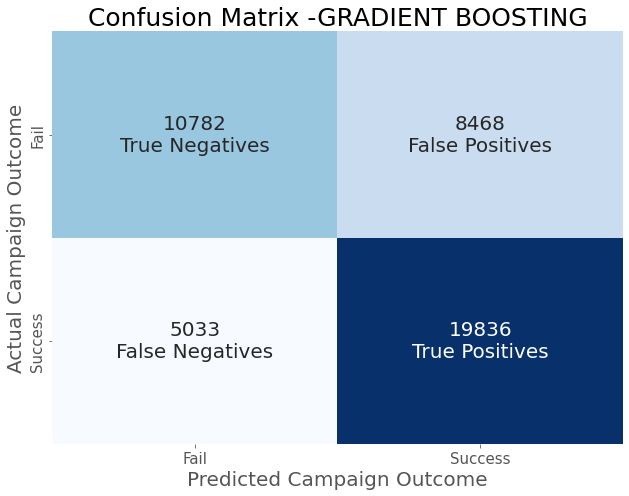

In [38]:
cm = confusion_matrix(y_val,xgBoost_pred)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix -GRADIENT BOOSTING', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
#plt.savefig('Confusion_matrix_Bernoulli.png')
#plt.savefig('Confusion_matrix_Bernoulli.svg')
plt.show()

In [39]:
xgBoost_y_score = xgBoost.predict_proba(X_val)[:, 1]
xgBoost_fpr, xgBoost_tpr, auc_thresholds = roc_curve(y_val, xgBoost_y_score)
roc_auc_xgBoost = auc(xgBoost_fpr, xgBoost_tpr)
print(auc(xgBoost_fpr, xgBoost_tpr))



0.7570273761784477


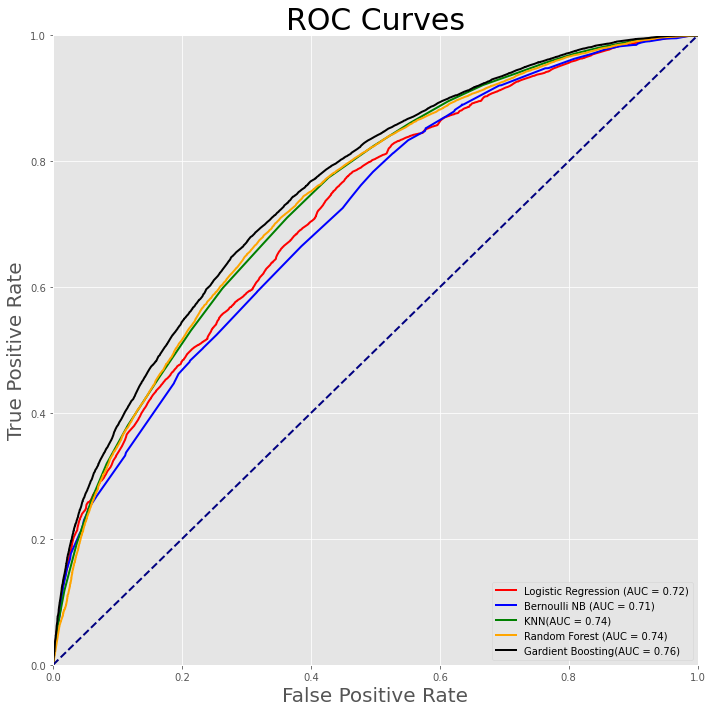

In [54]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr_test, logistic_tpr_test, color='red',lw=lw, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic_test)
plt.plot(bernoulli_fpr_test, bernoulli_tpr_test, color='blue',lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli_test)
plt.plot(knn_fpr_test, knn_tpr_test, color='green',lw=lw, label='KNN(AUC = %0.2f)' % roc_auc_knn_test)
plt.plot(forest_fpr,forest_tpr, color='orange',lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)
plt.plot(xgBoost_fpr, xgBoost_tpr, color='black',lw=lw, label='Gardient Boosting(AUC = %0.2f)' % roc_auc_xgBoost)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title('ROC Curves', size = 30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [1]:
pip install shap


  Using cached shap-0.40.0-cp310-cp310-win_amd64.whl



You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import xgboost
import shap


In [12]:
# train an XGBoost model
model = xgboost.XGBRegressor().fit(X_train, y_train)


In [35]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
shap_values = shap.TreeExplainer(model).shap_values(X_train)


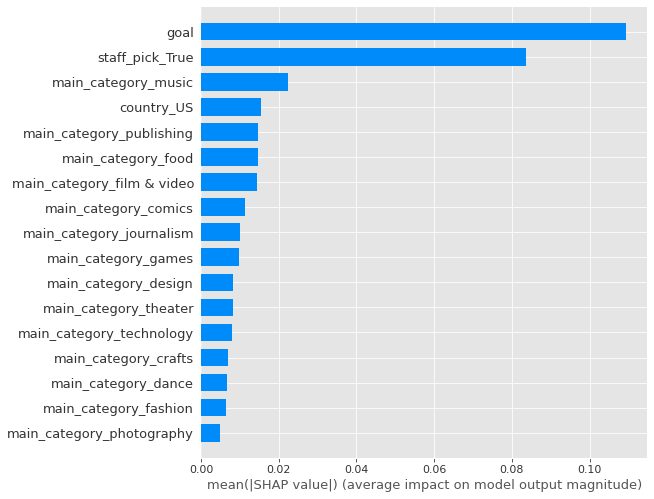

In [34]:
X1=['goal', 'staff_pick_True',
        'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']

shap.summary_plot(shap_values, X_train, plot_type="bar",feature_names=X1)
